# Trabalho Final de Data Science
**Claudio Davi de Souza**

### Descrição

Os dados desse dataset foram retirados do Kaggle disponível através do [link](https://www.kaggle.com/census/total-business-inventories-and-sales-data/home). Os dados obtidos mostram a relação inventário/venda ao final do mês. O número apresentado na coluna *value* representa a quantidade de meses que a loja ainda possui de inventário.

Ex.: 1.5 representa 1 mês e meio de estoque.

#### Objetivo
Analisar e verificar a distribuição da relação inventário/mês através dos anos.

### Importação das bibliotecas padrão

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
sales_ratio = pd.read_csv('../datasets/total-business-inventories-to-sales-ratio_1.csv')

In [3]:
sales_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 4 columns):
value             848 non-null object
realtime_start    848 non-null object
date              848 non-null object
realtime_end      848 non-null object
dtypes: object(4)
memory usage: 26.6+ KB


De acordo com as informações disponibilizadas no site do dataset as colunas realtime_start e realtime_end representam o momento da execução do extrator de dados, portanto serão removidas.

In [4]:
sales_ratio.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)
# Vamos indexar pelas datas para facilitar nossas análises
sales_ratio['date'] = pd.to_datetime(sales_ratio['date'])
sales_ratio['value'] = pd.to_numeric(sales_ratio['value'], errors='coerce')
sales_ratio.set_index('date', inplace=True)

sales_ratio.head()

,value
date,
1948-01-01,NaN
1948-02-01,NaN
1948-03-01,NaN
1948-04-01,NaN
1948-05-01,NaN


In [5]:
sales_ratio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848 entries, 1948-01-01 to 2018-08-01
Data columns (total 1 columns):
value    320 non-null float64
dtypes: float64(1)
memory usage: 13.2 KB


Agora que os dados foram organizados ainda faltam duas coisas para começar,a primeira é remover as entradas contendo (NaN/Not a Number) pois é o sinal de que não existe amostra para aquela data e a segunda é ajustar a distribuição para mensal.

In [7]:
sales_ratio.dropna(inplace=True)
sales_ratio = sales_ratio.asfreq('M', method='ffill')
sales_ratio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 319 entries, 1992-01-31 to 2018-07-31
Freq: M
Data columns (total 1 columns):
value    319 non-null float64
dtypes: float64(1)
memory usage: 5.0 KB


A partir da descrição acima com 319 amostras, podemos notar que o valor mais alto de estoque é manter quase um mês e meio no armazém. Vamos verificar os quantiles dessa distribuição.

In [12]:
print(f'Média {np.round(np.mean(sales_ratio.value),2)}')
print(f'Desvio Padrão {np.round(np.std(sales_ratio.value),2)}')
print(f'Mediana {np.median(sales_ratio.value)}')
print(f'Mínimo {np.min(sales_ratio.value)}')
print(f'Máximo {np.max(sales_ratio.value)}')
print(f'25% dos valores estão abaixo de: {np.percentile(sales_ratio.value, 25)}')
print(f'50% dos valores estão abaixo de: {np.percentile(sales_ratio.value, 50)}')
print(f'75% dos valores estão abaixo de: {np.percentile(sales_ratio.value, 75)}')


Média 1.37
Desvio Padrão 0.08
Mediana 1.38
Mínimo 1.24
Máximo 1.56
25% dos valores estão abaixo de: 1.29
50% dos valores estão abaixo de: 1.38
75% dos valores estão abaixo de: 1.43


Como a média é diferente da mediana, podemos ver que temos um pouco de variação na distribuição, uma visualização pode ser bastante interessante aqui para averiguar a intensidade da inclinação à direita.

In [16]:
sns.set_style('whitegrid')
sns.set_palette('tab20')

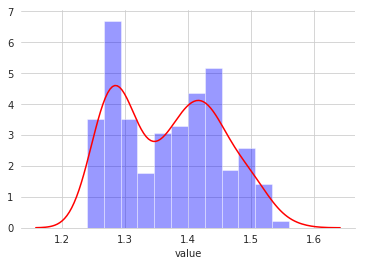

In [27]:
sns.distplot(sales_ratio.value,bins=12, color='b', kde_kws={'color': 'r'})
sns.despine(left=True)

Temos uma distribuição bimodal inclinada para a direita, isso pode significar que temos dois grupos de lojas diferentes, cada um com seu padrão, no nosso caso, um mais conservador, que tende a manter mais estoque e um agressivo onde a sua média de estoque tende a cobrir menos tempo mas vamos tentar considerar mais uma possibilidade: essa distribuição mudou com o tempo.

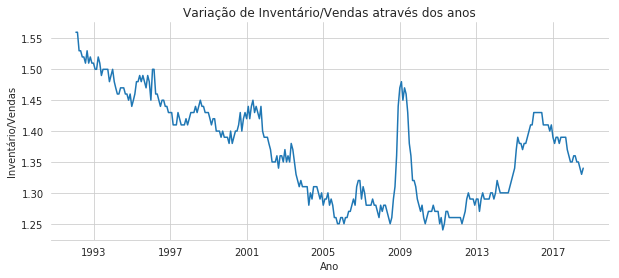

In [79]:
plt.figure(figsize=(10,4))
g = sns.lineplot(x=sales_ratio.index, y=sales_ratio.value, palette='tab20')
sns.despine(left=True)
g.set_title('Variação de Inventário/Vendas através dos anos')
g.set_xlabel('Ano')
g.set_ylabel('Inventário/Vendas')
plt.show()

Acertamos na hipótese, a distribuição dos valores mudou com o tempo. É notável que a relação entre inventário/vendas foi ficando mais equilibrada (próxima de 1) durante o período de 1993 até 2007. Onde em 2008/2009 teve um pico (que pode ter sido causado pela Crise Econômica de 2007/2008) e novamente um crescimento na aquisição de inventário.

O próximo objetivo é verificar se existe alguma variação mensal. Alguma espécie de sazonalidade.

In [33]:
sales_ratio['month'] = sales_ratio.index.month

In [50]:
sales_ratio.tail(5)

,value,month
date,,
2018-03-31,1.35,3
2018-04-30,1.35,4
2018-05-31,1.34,5
2018-06-30,1.33,6
2018-07-31,1.34,7


In [51]:
sales_monthly = sales_ratio['2016-01-01':'2018-01-01'].groupby('month').mean()

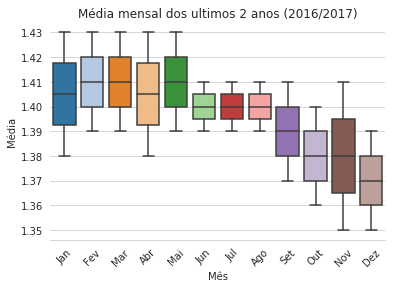

In [64]:
g = sns.boxplot(x=sales_ratio['2016-01-01':'2018-01-01'].index.month, y=sales_ratio['2016-01-01':'2018-01-01'].value)
sns.despine(left=True)
g.set_title('Média mensal dos ultimos 2 anos (2016/2017)')
g.set_xlabel('Mês')
g.set_ylabel('Média')
g.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.show()

Podemos perceber uma queda que nesse gráfico fica bem pronunciada, porém notando a unidade de medida, verificamos que ela está relacionada à segunda casa decimal, porém perceptível mesmo assim. Através dessa análise podemos concluir que existe sim um declínio no acúmulo de inventário que pode se dar por diversos fatores, que infelizmente não temos dados para analisar. 

Porém, podemos verificar ainda como foi essa variação nos ultimos 10 anos:

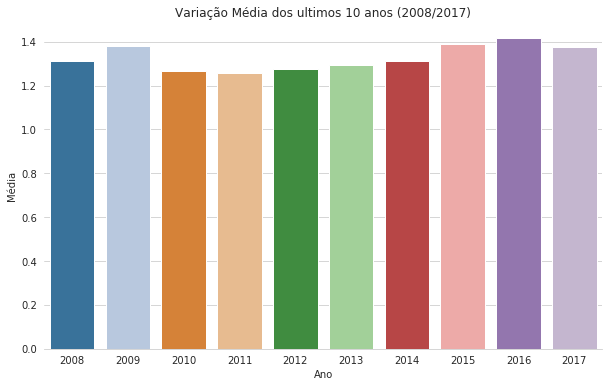

In [80]:
plt.figure(figsize=(10,6))
g = sns.barplot(x=sales_ratio['2008-01-01':'2018-01-01'].index.year, y=sales_ratio['2008-01-01':'2018-01-01'].value,ci=None, saturation=0.65, palette='tab20')
g.set_title('Variação Média dos ultimos 10 anos (2008/2017)')
g.set_ylabel('Média')
g.set_xlabel('Ano')
sns.despine(left=True)



### Conclusão

A partir das análises feitas acima, podemos verificar que existe um padrão de declínio geral no acúmulo de estoque, que foi gravemente afetado pela crise econômica de 2007/2008; após esse período a economia se reestabeleceu, porém o acúmulo foi desestabilizado novamente em 2016, muito possívelmente resultado das tensões políticas nos Estados Unidos na época.

O acúmulo de estoque é bastante afetado pelo estado econômico geral do país, quando a economia está equilibrada a sobra de estoque tende a ser menor, gerando maior giro de capital e evitando o acúmulo de recursos.